Bu kernal'da Pima Indians Diabetes Database veri çerçevesi hakkında bilgi edineceğiz , veri çerçevesinde ön işlemler yapacağız ve veri görselleştirme ile veri çerçevizi daha iyi tanıyacağız.

*SkinThicknessTriceps :skin fold thickness (mm) /n

*Insulin: 2-Hour serum insulin (mu U/ml)

*BMI: Body mass index (weight in kg/(height in m)^2)

*DiabetesPedigreeFunction :Diabetes pedigree function

*Age:Age (years)

*Outcome :Class variable (0 or 1) 268 of 768 are 1, the others are 0



Aşağıda ihtiyacımız doğrultusunda kullanacağımız kütüphaneleri yükleyelim.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Veri çerçevemizi bulunduğumuz dizinden yükleyelim ve bir veri çerçevesi haline getirerek df değişkenine atayalım. (pd.read_csv(...csv))

In [ ]:
df = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

Veri çerçevemizin ilk 10 gözlemini görüntüleyelim.


In [ ]:
df.head(10)

Veri çerçevemizin rastgele 10 gözlemini görüntüleyelim.


In [ ]:
df.sample(10)

Veri çerçevemizin son 10 gözlemini görüntüleyelim.

In [ ]:
df.tail(10)

Veri çerçevesindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımını görüntüleyelim.

In [ ]:
df.info()

Veri çerçevemizin hangi değişkenlerden oluştuğunu görüntüleyelim.

In [ ]:
df.columns

Veri çerçevesinin kaç öznitelik ve kaç gözlemden oluştuğunu görüntüleyelim.

In [ ]:
df.shape

Veri çerçevemizde kaç adet eksik değer olduğunu görüntüleyelim.

In [ ]:
df.isnull().sum()

Yukarıda anlaşıldığı gibi veri çerçevemizde eksik değerin yok olduğunu görüyoruz. Fakat veriyi incelediğimizde aslında eksik değerlere sahip olduğumuzu göreceğiz . Şimdi veri çerçevimizi biraz daha inceleyelim.

Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

In [ ]:
df.describe().T

Yukarıda veri çerçevemizin temel istatistik değerlerin ulaşıyoruz. Gözlem sayısı, gözlemlerin ortalaması, gözlemlerin standart sapması,gözlemlerin minumum ve maximum değerlerini, medyan değeri gibi değerleri görüntüleyebiliyoruz. İstatistiklere bakarak yorum yaptığımızda çoğu özniteliğin minumum değerinin '0' olduğu görülür. Veri çerçevemizi daha iyi anlayabilmek için yapılan araştırmalarda bu değerlerin '0' değeri almasının yanlış olduğunu görüyoruz. Veride eksik bilgiler yerine '0' değernin yazıldığını anlayabiliyoruz. Ortalama ve standart sapmalara bakıldığında bazı özniteliklerin düzgün dağılmadığı görülmektedir. Standart sapmanın yüksekliği verilerin düzgün dağılmadığını göstermektedir.

Veri çerçevemizde öznitelikler arasında ilişkileri belirlemek amacıyla korelasyon katsayıları hakkında fikir yürütelim. 

In [ ]:
df.corr()

Korelasyon matrisine bakarak en güçlü pozitif ilişkilerin 'Age' ile 'Pregnancies' sonrasında ' Glucose' ie 'Outcome' arasında olduğu gözlenmektedir. 

Önceden de belirttiğimiz gibi veri çerçevemiz inceledendiğinde NaN değerler olmadığını görmüştük. Fakat veri çerçevemiz hakkında daha ayrıntılı araştırma yaptığımızda bazı özniteliklerin '0' değeri alamayacağını gözlemledik. Bu değerlerin eksik veriler olduğunu anladık. Bu sebepten dolayı bu nitelikleri NaN olarak değiştiyoruz

In [ ]:
df_yeni=df.copy(deep=True)
df_yeni[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_yeni[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

Değerlerimizi değiştirdikten sonra df_yeni değişkenin rastgele 10 gözlemini görüntüleyelim.

In [ ]:
df_yeni.sample(10)

Veri çerçevemizde kaç adet eksik değer olduğunu görüntüleyelim.

In [ ]:
df_yeni.isnull().sum()

Yeni veri çerçevemizin temel istatistik değerlerini görüntüleyelim.

In [ ]:
df_yeni.describe().T

'0' değerlerimizi NaN olarak değiştirdiğimizde temel istatistik değerlerinin de değiştiği gözlenmektedir. Değişimde ortalamarın arttığı standart sapmaların azaldığı gözlenmektedir. Verimiz böylelikle dağılımı dağınık olan veriden düzgün dağılımlı bir veriye doğru ilerlemektedir.

Yeni veri çerçevemizin öznitelikleri arasında ilişkilerini belirlemek amacıyla korelasyon katsayıları hakkında fikir yürütelim.

In [ ]:
df_yeni.corr()

Korelasyon matrisimizde görüldüğü gibi negatif ilişkilerin azaldığı gözlenmektedir. İlişkilerin pozitif yönde arttığı gözlenmektedir. En önemli gözlem ise 'BMI' özniteliği ve 'SkinThickness' özniteliği arasında korelasyon şiddeti artarak en güçlü pozitif ilişkiye sahip olmuştur.

Veri çerçevemizin yeni ve eski halini görselleştirerek gözlemleyelim. 

In [ ]:
df.hist(figsize = (20,20))
plt.show()

In [ ]:
df_yeni.hist(figsize=(20,20))
plt.show()

Veri çerçevemizde eksik bilgi istemiyoruz. Bu verileri nasıl dolduracağımıza karar verdik. 'BloodPressure','Glucose', 'SkinThickness ', 'Insulin' ve 'BMI' değerlerini medyanlarıyla dolduruyoruz. Medyanlarıyla doldurmayı tercih etmemizin sebebi ise standart sapma ve ortalama gibi temel istatistik değerlerinde büyük oranda değişim olmadığını göstermektedir.  

In [ ]:
df_yeni['Glucose'].fillna(df_yeni['Glucose'].median(), inplace = True)
df_yeni['BloodPressure'].fillna(df_yeni['BloodPressure'].median(), inplace = True)
df_yeni['SkinThickness'].fillna(df_yeni['SkinThickness'].median(), inplace = True)
df_yeni['Insulin'].fillna(df_yeni['Insulin'].median(), inplace = True)
df_yeni['BMI'].fillna(df_yeni['BMI'].median(), inplace = True)

Eksik verilerimizi doldurduk. Şimdi veri çerçevemizde eksik veri olup olmadığını kontrol edelim.

In [ ]:
df_yeni.isnull().sum()

Göründüğü gibi artık veri çerçevemizde eksik veri gözlenmemektedir.

Eksik veriler olmadan veri çerçevemizin temel istatistik değerlerini ve korelasyonlarını görüntüleyelim.

In [ ]:
df_yeni.describe().T

Veri çerçevemizin son halinde standart sapmaların iyice azaldığını gördük. Bu bize verinin düzgün bir şekilde dağıldığını göstermektedir.Ortalama değerlerin de medyan değerlere olan yakınlığı da bunu kanıtlar derecede.

In [ ]:
df_yeni.corr()

Veri çerçevemizde eksik verileri doldurduğumuzda ilişkilerin yeniden değiştiği gözlenmektedir.

Veri çerçevemizde eksk bilgileri tamamladıktan sonra korelasyon matrisini ısı haritasında çizdirerek daha iyi gözlemleyelim. 

In [ ]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_yeni.corr(),annot=True,linewidths=5,fmt='.0%',ax=ax)
plt.show()

Isı haritasında görüldüğü gibi 'BMI' ile 'SkinThickness' ve ' Age' ile 'Pregnancies' arasında en güçlü pozitif ilişkinin olduğu gözlenmektedir. DiabetsPedigreeFunction' ile 'Pregnancies' ile zayıf negatif ilişki gözlenmektedir.


Şimde de veri çerçevemizin son halini görselleştrirme kütüphaneleri kullanarak veri çerçevemizi daha iyi tanıyalım.

Veri çerçevemizin özniteliklerini daha iyi yorumlayabilmek için boxplot kullanalım.

In [ ]:
fig=plt.figure(figsize=(20,10))
sns.boxplot(data=df_yeni)
plt.show()

En güçlü pozitif ilişkiye sahip olanlardan 'Age' ile 'Pregnancies' özniteliklerini  scatterplot ile görüntüleyelm.

In [ ]:
plt.figure(figsize=(18,5))
sns.scatterplot( x='Age', y='Pregnancies',color='red',data=df_yeni)
plt.title('AGE-PREGNANCİES')
plt.show()

Bir diğer en güçlü pozitif ilişkiye sahip olan 'SkinThicness' ile 'BMI' öznteliklerini regplot ile çizdirerek görüntüleyelim.

In [ ]:
plt.figure(figsize=(18,5))
sns.regplot( x='SkinThickness', y='BMI',data=df_yeni)
plt.title('SKİNTİCKNESS-BMI')
plt.show()

Şimdi de negatif ilişki gözlemlenen 'DiabetsPedigreeFunction' ile 'Pregnancies' özniteliklerini lmplot ile çizdirerek görüntüleyelim. Göründüğü gibi negatif ilişki oldukça düşüktür.

In [ ]:
plt.figure(figsize=(18,5))
sns.lmplot( x= 'DiabetesPedigreeFunction', y='Pregnancies',data=df_yeni)
plt.title('Diabets Pedigree Function -Pregnancies')
plt.show()

Veri çerçevemizin en önemli özniteliğinin dağılımını gözlemleyelim.

In [ ]:
df_yeni['Outcome'].value_counts()

In [ ]:
fig1, ax1 = plt.subplots(1,2,figsize=(8,8))
sns.countplot(df_yeni['Outcome'],ax=ax1[0])
labels = 'Diabetic', 'Healthy'

df_yeni.Outcome.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

Veri çerçevemizin sonucuna bakarsak %65.1'i diyabet hastası %34.9' u sağlıklı olduğu gözlenmektedir. Bu da bize veri çerçevemizin dengeli olmadığını gösteriyor. Fakat çok dengesiz de değildir yorumunu yapabiliyoruz.

Veri çerçevemize yeni bir öznitelik ekleyelim.'Age' özniteliğindeki değerleri gruplandıralım. Yaşlara göre 4 farklı hedef kitle grubu ortaya çıkartalım

In [ ]:
df_yeni['Age']=df_yeni['Age']
bins=[20,35,50,65,81]
labels=['Genç','Orta Yaş','Yetişkin','Yaşlı']
df_yeni['yas_grp']=pd.cut(df_yeni['Age'],bins,labels=labels)

Yeni oluşan veri çerçevemizin ilk 5 gözlemini görüntüleyelim.

In [ ]:
df_yeni.head()

Yaş gruplarımızda kaçar kişinin olduğunu görüntüleyelim.

In [ ]:
df_yeni.yas_grp.value_counts()

Yaş gruplarımızı görselleştirelim.

In [ ]:
colors = ['green','yellow','orange','red']
labels = df_yeni.yas_grp.value_counts().index
plt.title('Hedef Yaş Grubu',color = 'blue',fontsize = 20)
plt.pie(df_yeni.yas_grp.value_counts(),colors=colors,autopct='%1.1f%%',labels=labels)
plt.show()

Hedef yaş gruplarımızı belirledik. Şimdi yaş gruplarıyle öz niteliklerimizin karşılaştırmalarını yapalım.

Hedef yaş grubu ile 'Pregnancies' özniteliği arasındaki ilişkiyi gözlemleyelim.

In [ ]:
plt.figure(figsize=(18,5))
sns.violinplot(x = "yas_grp", y = "Pregnancies", data = df_yeni);
plt.title('YAŞ GRUBU- PREGNANCİES')
plt.show()

Hedef yaş grubu ile 'Glucose' özniteliği arasındaki ilişkiyi gözlemleyelim.

In [ ]:
plt.figure(figsize=(18,5))
sns.violinplot(x = "yas_grp", y = "Glucose", data = df_yeni);
plt.title('YAŞ GRUBU- GLUCOSE')
plt.show()

Hedef yaş grubu ile 'Skinthicness' özniteliği arasındaki ilişkiyi gözlemleyelim.

In [ ]:
plt.figure(figsize=(18,5))
sns.violinplot(x = "yas_grp", y = "SkinThickness", data = df_yeni);
plt.title('YAŞ GRUBU- SkinThickness')
plt.show()

Hedef yaş grubu ile 'BloodPressure' özniteliği arasındaki ilişkiyi gözlemleyelim.

In [ ]:
plt.figure(figsize=(18,5))
sns.violinplot(x = "yas_grp", y = "BloodPressure", data = df_yeni);
plt.title('YAŞ GRUBU- BLOODPRESSURE')
plt.show()

Hedef yaş grubu ile 'Insulin' özniteliği arasındaki ilişkiyi gözlemleyelim.

In [ ]:
plt.figure(figsize=(18,5))
sns.violinplot(x = "yas_grp", y = "Insulin", data = df_yeni);
plt.title('YAŞ GRUBU- INSULIN')
plt.show()

Hedef yaş grubu ile 'BMI' özniteliği arasındaki ilişkiyi gözlemleyelim.

In [ ]:
plt.figure(figsize=(18,5))
sns.violinplot(x = "yas_grp", y = "BMI", data = df_yeni);
plt.title('YAŞ GRUBU- BMI')
plt.show()

Hedef yaş grubu ile 'DiabetesPedigreeFunction' özniteliği arasındaki ilişkiyi gözlemleyelim.

In [ ]:
plt.figure(figsize=(18,5))
sns.violinplot(x = "yas_grp", y = "DiabetesPedigreeFunction", data = df_yeni);
plt.title('YAŞ GRUBU- DIABET PEDIGREE FUNCTION')
plt.show()

Hedef yaş grubu ile 'Outcome' özniteliği arasındaki ilişkiyi gözlemleyelim.

In [ ]:
plt.figure(figsize=(18,5))
sns.violinplot(x = "yas_grp", y = "Outcome", data = df_yeni);
plt.title('YAŞ GRUBU- OUTCOME')
plt.show()

Veri çerçevemizin temel amacı diyabetin çıkıp çıkmadığı durumları incelemek ve yorumlamak . Şimdi veri setimizin temel özniteliği olan 'Outcome' özniteliği ile diğer özniteliklerin karşılaştırılmasını görselleştirelim. 

İlk olarak arasında en güçlü pozitif ilişki olan 'Glucose' özniteliği ile karşılaştıralım. Yoğunluğu gözlemleyebileceğimiz jointplot kullanıyoruz.

In [ ]:

sns.jointplot(x = df_yeni["Outcome"], y = df_yeni["Glucose"],kind='kde', color = "red");

Yukarıdaki grafikte hastalığın olmadığı insanlarda Glucose miktarının daha az olduğu yoğunluğa bakarak gözlenmektedir.

Şimdi ise korelasyon matrisimize göre en güçlü pozitif ilişkilere üçüncü bir boyut ekleyerek 'Outcome' özniteliğini inceliyoruz.

In [ ]:
plt.figure(figsize=(18,5))
sns.scatterplot( x='Age', y='Pregnancies',hue='Outcome',data=df_yeni)
plt.title('AGE-PREGNANCİES')
plt.show()

'Age' özniteliği arttıkça hastalığın daha çok ortaya çıktığı gözlenmektedir.

In [ ]:
plt.figure(figsize=(18,5))
sns.scatterplot( x= 'SkinThickness', y='BMI',hue='Outcome',data=df_yeni)
plt.title('SKİNTİCKNESS-BMI')
plt.show()

Hastalığın olduğu insanlarda iki özniteliğinde çok olduğu gözlenmektedir.

Son olarak 'Insulin' ve 'Glucose' özniteliklerine üçüncü bir boyut olarak 'outcome' özniteliğini ekliyoruz.


In [ ]:
plt.figure(figsize=(18,5))
sns.scatterplot( x='Insulin', y='Glucose',hue='Outcome',data=df_yeni)
plt.title('INSULIN-GLUCOSE')
plt.show()

Görüldüğü gib Glucose miktarının fazla Insulin miktarının az olduğu noktalardda hastalık oranı daha fazladır.

Veri setimizi temel istatistik ve görselleştirme yardımıyla inceleyip öğrenmiş olduk. Şimdi veri setimizle makine öğrenmesi modelleri geliştirerek veri setimizden ne kadar başarılı sonuçlar alabileceğimizi görelim.

Öncelikle veri setimizin son halinde kullanmayacağımız öznitelikleri çıkartıp sonrasında veri setimizi normalize edelim.

In [ ]:
y=df_yeni["Outcome"].values

Hedef özniteliğimizi y değişkenine atadık.

In [ ]:
x_data = df_yeni.drop(["Outcome","yas_grp"],axis=1)

Hedefi etkileyecek özniteliklerde kullanmayacağımız "Outcome" ve " yas_grp" özniteliklerini silerek x_data adlı değişkenine atadık.

In [ ]:
x=(x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

x_data değişkenindeki özniteliklerimizi normalize ettik.

In [ ]:
x.head()

Görüldüğü gibi özniteliklerimiz sadece  0-1 arası değerler almaktadır.

Hangi döznitelik ne kadar anlamlı görmek ve ileri düzeyde istatistik çıktılarını görmek istersek statsmodel çizdirebiliriz.

In [ ]:
import statsmodels.api as sm
stmodel = sm.OLS(y, x).fit()
stmodel.summary()

P>|t| değerlerine bakarsak bütün özniteliklerin  hedef değişken üzerinde anlamlı olduğunu görmekteyiz.

Hedef değişkenimiz 0-1 değerleri aldığı için  Binary Classiffication algoritmaları geliştireceğiz.  NaiveBayes, DecisionTree ve KNN algoritmalarında modellemeler yapacağız ve souçlarını inceleyeceğiz.

Veri setimizin belirli bir bölümü eğitmekte geri kalan bölümünü ise test etmekte kullanacağız. 

"sklearn.model_selection" kütüphanesinden "train_test_split"  methodunu import ediyoruz


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)


Veri setimizin %80'i eğitmek için %20'si test amacıyla kullanılacaktır. Bunu "test_size" kısmında belirliyoruz.

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

Göründüğü gibi %80 i test için kullanılacaktır.

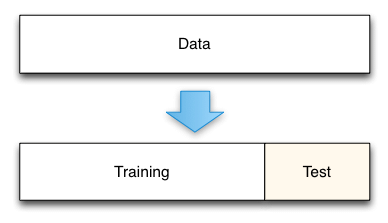

#  Decision Tree  Classifier

"sklearn.tree" kütüphanesinden "DecisionTreeClassifier" methodunu import edelim.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

"DecisionTreeClassifier" methodunu  "dt" adlı variable' a atıyoruz.Bu methodumuz parametre olarak "criterion" ve "random_state" alır. Criterion ağacımız hangi kritere göre oluşturulacağını belirler. Biz entropiye göre olmasını istiyoruz çünkü en yaygın karar ağacı entropi temelli karar ağaçlarıdır.Sonrasında datamızı fit ediyoruz( eğitiyoruz). Paremetre olarak eğitilecek kısımları yani "x_train" ve "y_train"'i alıyor.

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(x_train,y_train)

Algoritmamız sonucunda tahmin edilen hedef değişkenlerimizi "predict" methoduyla listeleyelim. Methodumuz test edilecek kısmı parametre olarak almaktadır.

In [ ]:
dtpre=dt.predict(x_test)
dtpre

Tahmin edilen sonuçları listeledikten sonra aradaki farklı görmek için gerçek sonuçlarımızı listeleyelim.

In [ ]:
y_test

Aradaki farkı daha iyi anlayabilmemiz için "sklearn.metrics" küyüphanesinden "confusion_matrix" methodunu ekliyoruz. Method parametre olarak gerçek sonuçlar ve algoritmamız sonucunda elde ettiğimiz sonuçları almaktadır.

In [ ]:
from sklearn.metrics import confusion_matrix
dtmatrix=confusion_matrix(y_test,dtpre)
dtmatrix

Oluşturulan matrise bakarsak "0" olması gereken 28 adet "1" tahmini elde edilmişrie. "1" olması gereken 18 adet "0" tahmini elde edilmiştir. Toplamda 46 yanlış tahmin yapılmıştır. 108 doğru tahmin yapılmıştır.

Modelimiz sonucunda modelin hedef değerini ne kadar olasılıkla doğru tahmin ettiğini elde edelim.

In [ ]:
print("score:",dt.score(x_test,y_test))

Yaklaşık olarak %70 oranında doğru tahmin ettiği görülmektedir.

# Naive Bayes

 "sklearn.naive_bayes" kütüphanesinden  "GaussianNB" methodunu import ediyoruz.

In [ ]:
from sklearn.naive_bayes import GaussianNB

"GaussianNB" methodunu "nb" adlı variable' a atıyoruz.Sonrasında datamızı fit ediyoruz( eğitiyoruz). Paremetre olarak eğitilecek kısımları yani "x_train" ve "y_train"'i alıyor.

In [ ]:
nb=GaussianNB()
nb.fit(x_train,y_train)

Algoritmamız sonucunda oluşan hedef değişkenlerimizi görmek için "predict" methodunu çalıştırıyoruz. Parametre olarak test değişkeni alınmaktadır.

In [ ]:
deneme=nb.predict(x_test)
deneme

Aradaki farkı görmek için veri setimizdeki gerçek hedef değişkenlerimizi listeleyelim.

In [ ]:
y_test

Araki farkı anlayabilmek için confusion matrix oluşturalım.

In [ ]:
cm=confusion_matrix(y_test,deneme)
cm

Oluşturulan matrise bakarsak "0" olması gereken 15 adet "1" tahmini elde edilmişrie. "1" olması gereken 18 adet "0" tahmini elde edilmiştir. Toplamda 33 yanlış tahmin yapılmıştır. 121 doğru tahmin yapılmıştır.

Modelimiz sonucunda modelin hedef değerini ne kadar olasılıkla doğru tahmin ettiğini elde edelim.

In [ ]:
nb.score(x_test,y_test)

Yaklaşık olarak %78 oranında modelin doğru tahmin ettiğini görmekteyiz.

# KNN(k-Neighbors Classifier)

"sklearn.neighbors" kütüphanesinden  "KNeighborsClassifier" methodunu import ediyoruz.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

"KNeighborsClassifie" methodunu "knn" adlı değişkene  atıyoruz.Sonrasında datamızı fit ediyoruz( eğitiyoruz). Paremetre olarak eğitilecek kısımları yani "x_train" ve "y_train"'i alıyor. 

Diğer modellerimizden farklı olarak "n_neighbors" adında bir parametre almaktadır. Bu parametre k değeridir. Yani seçilecek komşu sayısıdır.

In [ ]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

Modelimiz sonucunda modelin hedef değerini ne kadar olasılıkla doğru tahmin ettiğini elde edelim.

In [ ]:
knn.score(x_test,y_test)

Yaklaşık olarak %78,5 oranında modelin doğru tahmin ettiğini görmekteyiz.

"n_neighbors" parametresinin modelimizdeki etkisini görmek için değerde değşiklik yapıyoruz.

In [ ]:
knn1= KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train,y_train)

In [ ]:
knn1.score(x_test,y_test)

Görüldüğü gibi n_neighbors parametresinde değişiklik yaptığımızda 3'de oranımız %78,5 civarındayken şimdi yaklaşık olarak %78 değeri almaktadır. n_neighbors değerinin modelimizde oldukça etkili olduğu görülmektedir.

Peki bizler en iyi  n_neighbors değerini nasıl bulacağız.

In [ ]:
score_list=[]
for each in range (1,15):
    knn85=KNeighborsClassifier(n_neighbors=each)
    knn85.fit(x_train,y_train)
    score_list.append(knn85.score(x_test,y_test))
plt.plot(range(1,15),score_list)

Görüldüğü gibi  n_neighbors değerlerinde değişiklik oluştuğunda tahmin oranımızda da değişiklik gözlenmektedir.


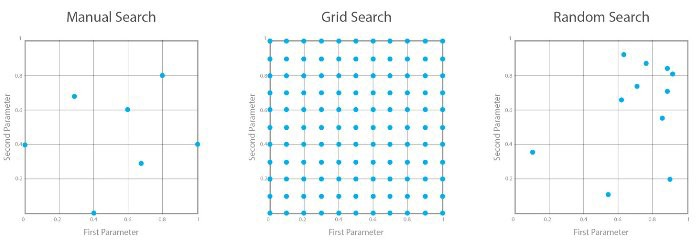

Grid Search kütüphanesi yardımıyla en iyi  n_neighbors değerini bulup modelimizi geliştirebiliriz.

In [ ]:
from sklearn.model_selection import GridSearchCV
grid={"n_neighbors":np.arange(1,15)}


In [ ]:
knn2=KNeighborsClassifier()
knn2_cv = GridSearchCV(knn2,grid,cv=10)
knn2_cv.fit(x_train,y_train)

In [ ]:
knn2_cv.best_score_

In [ ]:
knn2_cv.best_params_

Şimdi de KNN model geliştirmesinde Cross-Validation  kullanrak en iyi sonucu elde etmeye çalışacağız. Cross-validation veya “k-fold cross validation”, veri kümesinin rastgele ‘k’ tane gruba ayrılması işlemidir. Gruplardan biri test seti olarak kullanılırken ve geri kalanlar eğitim seti olarak kullanılır. Her bir grup bu şekilde tekrarlanarak model eğitilir ve diğer grup ile test edilir. Bu şekilde model tüm veriler ile eğitilmiş olacaktır ki bu modelin doğruluğu için oldukça gereklidir.

Örneğin, 5-fold cross validation için, veri kümesi 5 gruba ayrılır ve model 5 kez eğitilip test edilecektir, böylece her grup test seti olma şansı elde edecektir.

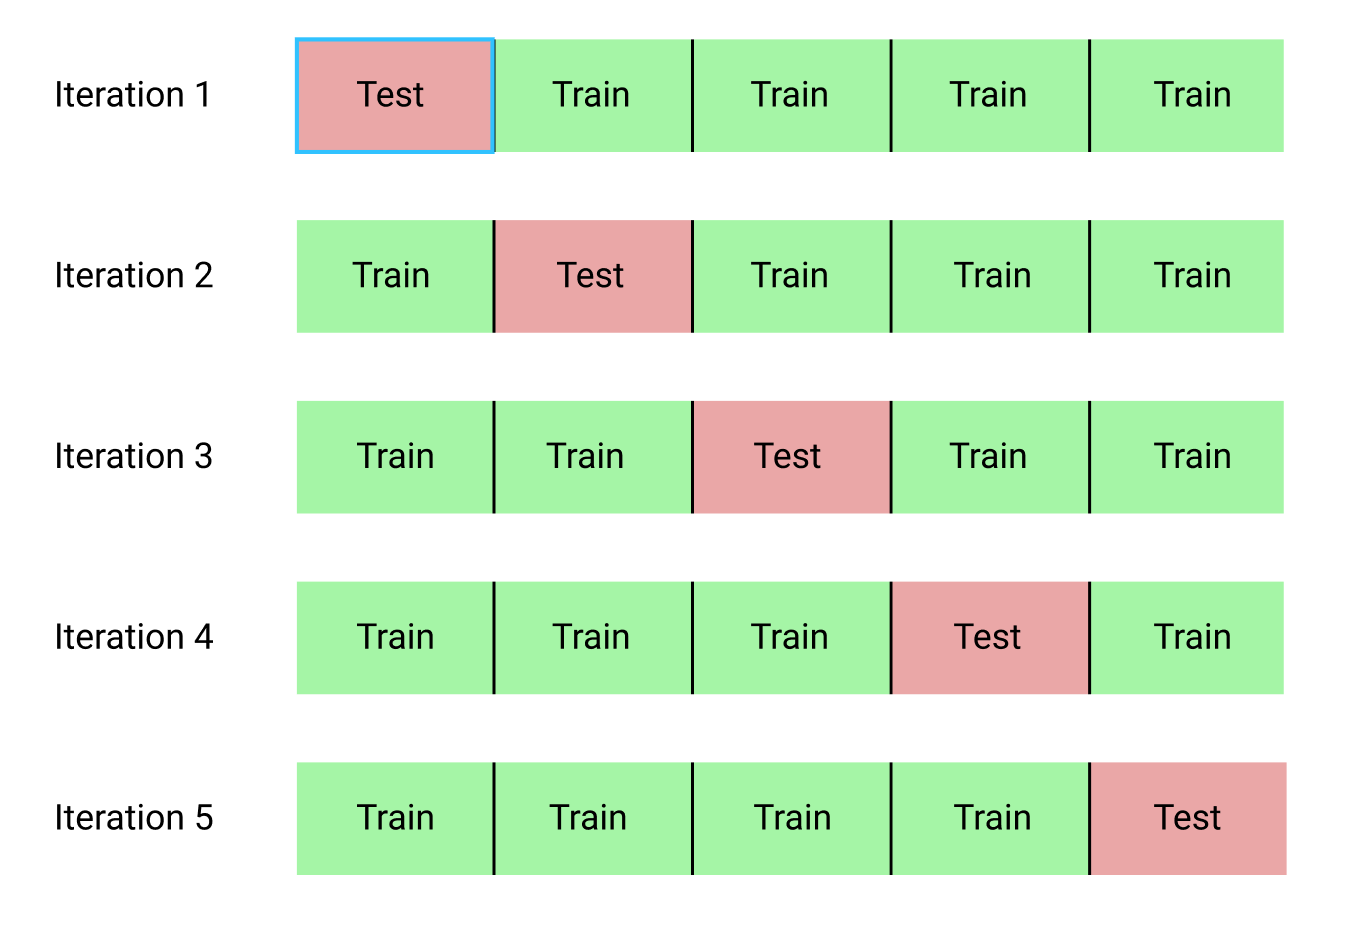

Grid Search sonucunda aldığımız en iyi n_neighbors değerni kullanarak bir model geliştiriyoruz.

In [ ]:
knn3=KNeighborsClassifier(n_neighbors=13)

"sklearn.model_selection" kütüphanesinden "cross_val_score" methodunu import ediyoruz.

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=knn3,X=x_train,y=y_train,cv=10)

"cross_val_score" methodu parametre olarak estimator,x,y ve cv değerlerini almaktadır.
estimator değerinde hangi model üzerine çalışma yapacağımızı belirtiriz.
cv değeri ise "k" değeridir. Datamızı kaç parçaya böleceğimizi ve kaç çapraz eşleşme yapacağımızı belirtiriz.

Çapraz eşleşmeler sonucunda aldığımız sonuçlara göre ortalama %73 oranında doğru tahmin yapabiliriz.

In [ ]:
np.mean(accuracies)

Çapraz eşleşmeler sonucunda oranlarımıza bakarsak standart sapmamızın düşük olduğunu görmekteyz. Bu da bize oranların düzgün dağıldığını göstermektedir.

In [ ]:
np.std(accuracies)

Çapraz eşleşme sonucunda aldığımız doğru tahmin oranlarına bakalım.

In [ ]:
accuracies